<IPython.core.display.Javascript object>


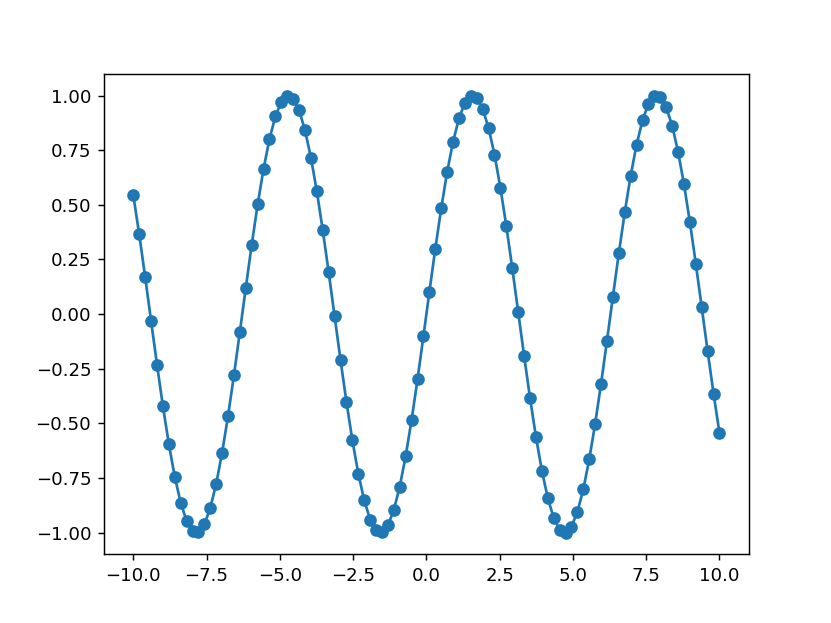

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker = "o")

In [26]:
import pandas as pd
from IPython.display import display

#人を表すデータセット
data = {'Name':["ken", "Shin", "HIroto", "Mika"],
       'Location':["Tokyo", "Niigata", "Yamagata", "Singapore"],
       'Age':[0,1,2,3]}

data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,ken,Tokyo,0
1,Shin,Niigata,1
2,HIroto,Yamagata,2
3,Mika,Singapore,3


,Name,Location,Age
0,ken,Tokyo,0
3,Mika,Singapore,3


In [29]:
import mglearn

In [32]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [37]:
print("keys of iris_dataset: \n{}".format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [42]:
print(iris_dataset['DESCR'][:-1] + "\n...") #description

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [43]:
print("target names: \n{}".format(iris_dataset['target_names']))

target names: 
['setosa' 'versicolor' 'virginica']


In [44]:
print("feature names: \n{}".format(iris_dataset['feature_names']))

feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [45]:
iris_dataset['data'].shape

(150, 4)

In [46]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [49]:
iris_dataset['target'] #teacher data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [60]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [63]:
#make Dataframe & name
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<IPython.core.display.Javascript object>


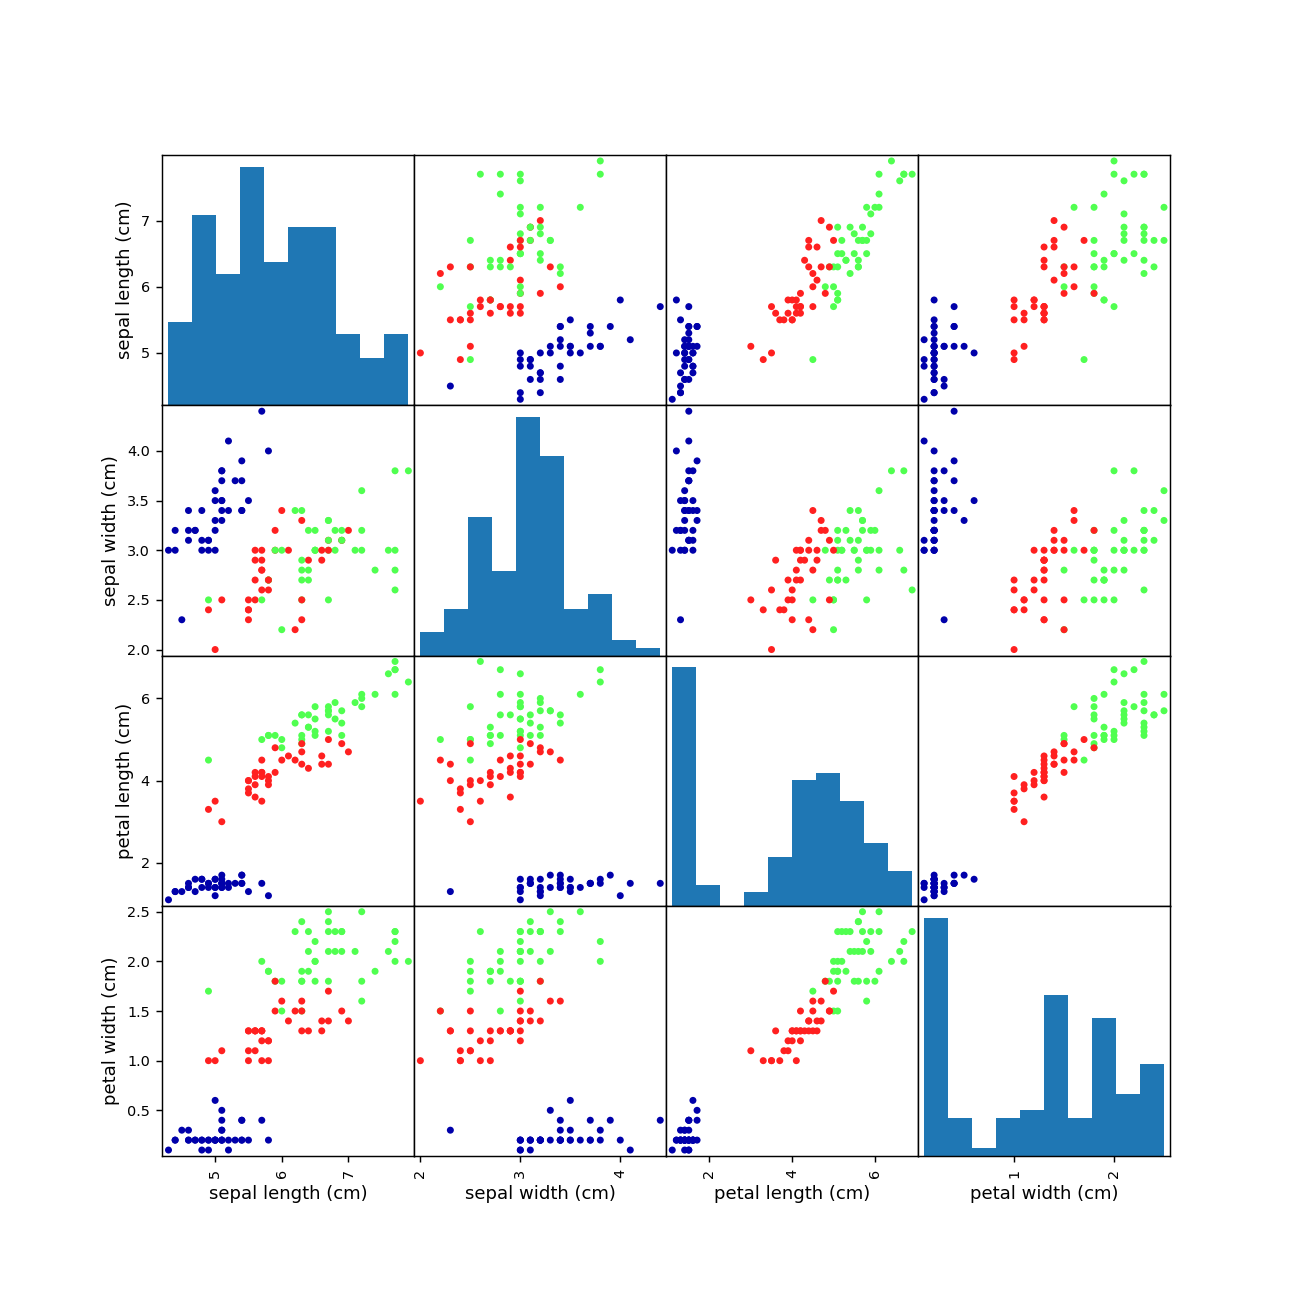

In [79]:
from pandas.plotting import scatter_matrix
grr = scatter_matrix(
    iris_dataframe, c = y_train, figsize = (10,10), marker = '.',
    #hist_kwds={'bins':20},
    s = 60, alpha = 1,
    cmap = mglearn.cm3
)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [82]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [84]:
X_new = np.array([[5,2.9,1,0.2]])
prediction = knn.predict(X_new)
prediction

array([0])

In [85]:
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [86]:
y_pred = knn.predict(X_test)
print("Test set prediction:\n{}".format(y_pred))

Test set prediction:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [87]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [88]:
knn.score(X_test, y_test)

0.9736842105263158